## Dynamics of multiple spin enembles: two driven-dissipative ensembles 

Notebook author: Nathan Shammah (nathan.shammah at gmail.com)

We use the Permutational Invariant Quantum Solver (PIQS) library, imported in QuTiP as $\texttt{qutip.piqs}$ to study the driven-dissipative open quantum dynamics of multiple two-level-system (TLS), or spin, ensembles.

We consider a system of two TLS ensembles with populations $N_1$ and $N_2$ with identical frequency $\omega_{0}$ with collective pumping and collective emission at identical rates, $\gamma_\text{CE}=(1+\bar{n})\gamma_0$ and $\gamma_\text{CP}=\bar{n}\gamma_0$, respectively, with $\bar{n}=\frac{1}{e^{\hbar\omega_0/k_\mathrm{B}T}-1}$ and 

\begin{eqnarray}
\dot{\rho} &=& 
-i\lbrack \omega_{0}\left(J_z^{(1)}+J_z^{(2)}\right),\rho \rbrack
+\frac{\gamma_\text {CE}}{2}\mathcal{L}_{J_{-}^{(1)}+ J_{-}^{(2)}}[\rho]
+\frac{\gamma_\text {CP}}{2}\mathcal{L}_{J_{+}^{(1)}+J_{+}^{(2)}}[\rho]
\end{eqnarray}

Ref. [2] has shown that for $N_1<N_2$, if the system is initialized in the state $|{\psi_0}\rangle=|{\downarrow\cdots\downarrow}\rangle_1\otimes|{\uparrow\cdots\uparrow}\rangle_2$, the system relaxes to a steady state for which the first subsystem is excited, i.e. $\langle J_z^{(1)}(\infty)\rangle>0$ and for some parameters  $\frac{\langle J_z^{(1)}(\infty)\rangle}{(N_1/2)}\rightarrow 0.5$, also in the limit of zero temperature, $T\rightarrow 0$.  

Notice that $\mathcal{L}_{J_{-}^{(1)}+ J_{-}^{(2)}}[\rho]\neq \mathcal{L}_{J_{-}^{(1)}}[\rho]+\mathcal{L}_{ J_{-}^{(2)}}[\rho]$, which is a case treated in Ref. [3] two obtain syncronized ensembles of atoms. 

Here we explore what happens when to the master equation of Eq. (1) one adds also collective and local terms relative to single ensembles, 

\begin{eqnarray}
\dot{\rho} &=& 
-i\lbrack \omega_{0}\left(J_z^{(1)}+J_z^{(2)}\right),\rho \rbrack
+\frac{\gamma_\text{CE}}{2}\mathcal{L}_{J_{-}^{(1)}+ J_{-}^{(2)}}[\rho]
+\frac{\gamma_\text{CP}}{2}\mathcal{L}_{J_{+}^{(1)}+J_{+}^{(2)}}[\rho]\\
&& +\frac{\gamma_\text{CEi}}{2}\mathcal{L}_{J_{-}^{(1)}}[\rho]
+\frac{\gamma_\text{CEi}}{2}\mathcal{L}_{J_{-}^{(2)}}[\rho]
+\sum_{n}^{N_1}\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}^{(1)}}[\rho]+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}^{(1)}}[\rho]+\sum_{n}^{N_2}\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}^{(2)}}[\rho]+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}^{(2)}}[\rho]
\end{eqnarray}

where $\gamma_\text {CEi}$ is the rate of superradiant decay for the individual ensembles of TLSs, $\gamma_\text{E}$ and $\gamma_\text{D}$ are the rates of local emission and dephasing.

Firstly, we will show how the collective dynamics of Eq. (1) can be investigated in a simple way using QuTiP's [4] $\texttt{jmat}$ function, which defines collective spins for maximally symmetric states in a Hilbert space of dimension $N_i+1$.

Secondly, we will exploit the permutational invariance of the local processes in Eq. (2) to investigate the exact dynamics using the Dicke basis, $\rho = \sum_{j,m,m'}p_{jmm'}|j,m\rangle\langle j,m'|$ [1], where $p_{jmm'}$ is a probability density. We will do so numerically using the PIQS library [1]. 

In the following we might use in plots thefollowing equivalent notation $\gamma_\text {CE}=\gamma_\Downarrow$ (gCE),
$\gamma_\text {CP}=\gamma_\Uparrow$ (gCP), $\gamma_\text {E}=\gamma_\downarrow$ (gE), $\gamma_\text {P}=\gamma_\uparrow$ (gP), and 
$\gamma_\text {D}=\gamma_\phi$ (gD).

In [1]:
from qutip import *
from qutip.piqs import *
import matplotlib.pyplot as plt
from scipy import constants

# 1) Collective processes only (QuTiP $\texttt{jmat}$)

### System properties - QuTiP jmat()
QuTiP's jmat() functions span the symmetric (N+1)-dimensional Hilbert space. They can be used to efficiently investigate the collective dynamics only.

In [2]:
# Number of TLSs in the two ensembles
N1 = 1
N2 = 4
N = N1 + N2

# TLSs bare frequency
w0 = 1

# Bose-Einstein distribution determines the occupation number
giga = 10**(6)
frequency_hertz = w0*10*giga 
temperature_kelvin = 10**(2)
x = (frequency_hertz / temperature_kelvin) * (constants.hbar / constants.Boltzmann)
n0 = 1/(np.exp(x)-1)
print("n0 =",n0)

# set collective pumping and collective emission rates (coupled ensembles) 
g0 = 1
gCE = g0 * (1 + n0)
gCP = g0 * n0
print("gCE =", gCE)
print("gCP =", gCP)

# define identity operators and norms in the tensor space 
dim1_mat = N1 + 1
dim2_mat = N2 + 1
id1_mat = qeye(dim1_mat)
id2_mat = qeye(dim2_mat)
norm2 = id2_mat.tr()
norm1 = id1_mat.tr()

# build collective spin operators for N1 and N2  
jx1_mat = jmat(N1/2,"x")
jx2_mat = jmat(N2/2,"x")
jy1_mat = jmat(N1/2,"y")
jy2_mat = jmat(N2/2,"y")
jz1_mat = jmat(N1/2,"z")
jz2_mat = jmat(N2/2,"z")
jm1_mat = jmat(N1/2,"-")
jm2_mat = jmat(N2/2,"-")

# place collective spin operators in tensor space (N1 + N2)  
jz1_tot = tensor(jz1_mat, id2_mat)
jz2_tot = tensor(id1_mat, jz2_mat)
jx12_mat = tensor(jx1_mat, id2_mat) + tensor(id1_mat, jx2_mat)
jy12_mat = tensor(jy1_mat, id2_mat) + tensor(id1_mat, jy2_mat)
jz12_mat = tensor(jz1_mat, id2_mat) + tensor(id1_mat, jz2_mat)
jm12_mat = tensor(jm1_mat, id2_mat) + tensor(id1_mat, jm2_mat) 
jp12_mat = jm12_mat.dag()

# define Hamiltonian  
h1_mat = w0 * jz1_mat
h2_mat = w0 * jz2_mat
htot = tensor(h1_mat, id2_mat) + tensor(id1_mat, h2_mat) 

# build Liouvillian using QuTiP
collapse_operators = [np.sqrt(gCE)*jm12_mat, np.sqrt(gCP)*jp12_mat]
L_collective = liouvillian(htot, collapse_operators)

n0 = 1309202.45774
gCE = 1309203.45774
gCP = 1309202.45774


In [3]:
#Check the algebra of the spin operators in the tensor space

print(jp12_mat*jm12_mat - jm12_mat*jp12_mat == 2*jz12_mat)
print(jx12_mat*jy12_mat - jy12_mat*jx12_mat == 1j*jz12_mat)

True
True


### Time integration

In [4]:
# set superradiant delay time for the excited ensemble (N2)
td0 = np.log(N2)/(N2*gCE)
tmax = 30 * td0
nt = 1001
t = np.linspace(0, tmax, nt)

#set initial tensor state for spins (Use QuTiP's jmat() basis)
excited1 = np.zeros(jz1_mat.shape)
excited2 = np.zeros(jz2_mat.shape)
ground1 = np.zeros(jz1_mat.shape)
ground2 = np.zeros(jz2_mat.shape)
excited1[0,0] = 1
excited2[0,0] = 1
ground1[-1,-1] = 1
ground2[-1,-1] = 1

excited1 = Qobj(excited1)
excited2 = Qobj(excited2)
ground1 = Qobj(ground1)
ground2 = Qobj(ground2)

sdp =  tensor(excited1, excited2)
sdap =  tensor(ground1, excited2)
ground12 =  tensor(ground1, ground2)

rho0 = sdap

In [5]:
#solve using qutip (using QuTiP's jmat() basis)
result = mesolve(L_collective, rho0, t, [], 
                 e_ops = [jz12_mat, jz1_tot, jz2_tot], 
                 options = Options(store_states=True))
rhot = result.states
jzt = result.expect[0]
jz1t = result.expect[1]
jz2t = result.expect[2]

### Visualization

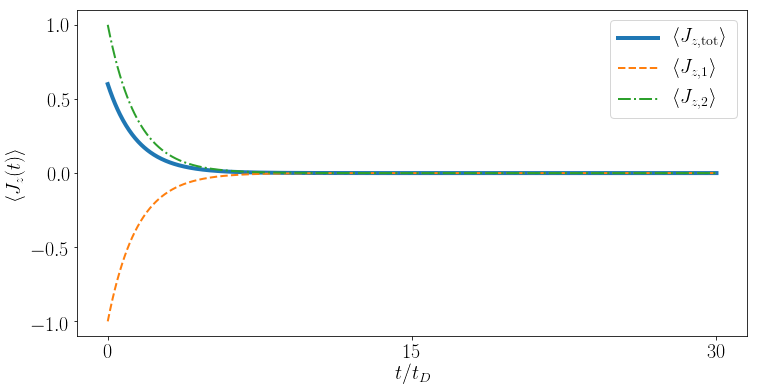

In [6]:
# plot jz1t, jz2t, jz12t

j2max = (0.5 * N + 1) * (0.5 * N)
jmax = 0.5 * N 
j1max = 0.5 * N1
j2max = 0.5 * N2 

label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize = label_size) 
plt.rc('ytick', labelsize = label_size)

fig_size = (12, 6)
lw = 2

fig1 = plt.figure(figsize = fig_size)
plt.plot(t/td0, jzt/jmax, '-', label = r"$\langle J_{z,\mathrm{ tot}}\rangle$", linewidth = 2*lw)
plt.plot(t/td0, jz1t/j1max, '--', label = r"$\langle J_{z,1}\rangle$", linewidth = lw)
plt.plot(t/td0, jz2t/j2max, '-.', label = r"$\langle J_{z,2}\rangle$", linewidth = lw)
plt.xlabel(r'$t/t_\text{D}$', fontsize = label_size)
plt.ylabel(r'$\langle J_z(t)\rangle$', fontsize = label_size)
plt.xticks([0, (tmax/2)/td0, tmax/td0])
plt.legend(fontsize = label_size)
plt.show()
plt.close()


In [7]:
# check partial traces
print(jz12_mat.ptrace(0)/norm2 == jz1_mat)
print(jz12_mat.ptrace(1)/norm1 == jz2_mat)

rho1pt = rho0.ptrace(0)
rho2pt = rho0.ptrace(1)

True
True


# 2) Local-collective processes in the Dicke basis (PIQS + QuTiP)

### System general and collective properties - QuTiP in the Dicke basis

In [8]:
# Number of TLSs in the two ensembles
N1 = 5
N2 = 15
N = N1 + N2
# local-collective simulations with this system size take approx 5 minutes on a MacBook Pro for time integration

# TLSs bare frequency
w0 = 1

# Bose-Einstein distribution determines the occupation number
# low temperature limit
frequency_hertz = 10**(13)
temperature_kelvin = 10**(1)
x = (frequency_hertz / temperature_kelvin) * (constants.hbar / constants.Boltzmann)
n0 = 1/(np.exp(x) -1)
print("occupation number, n0 = ",n0)

# set collective pumping and collective emission rates (coupled ensembles) 
g0 = 1
gCE = g0 * (1 + n0)
gCP = g0 * n0

# Local rates
gE = 1
gD = 1

# Collective rates of the single ensembles
gCEi = 1

# Algebra in the Dicke basis
[jx1_dicke, jy1_dicke, jz1_dicke] = jspin(N1)
jp1_dicke  = jspin(N1,"+")
jm1_dicke = jp1_dicke.dag()
[jx2_dicke, jy2_dicke, jz2_dicke] = jspin(N2)
jp2_dicke  = jspin(N2,"+")
jm2_dicke = jp2_dicke.dag()
# Bulding the tensor space for N1 + N2
dim1_dicke = num_dicke_states(N1)
dim2_dicke = num_dicke_states(N2)
id1_dicke = qeye(dim1_dicke)
id2_dicke = qeye(dim2_dicke)
norm2_dicke = id2_dicke.tr()
norm1_dicke = id1_dicke.tr()

# Place operators of a single ensemble (N1 or N2) in the tensor space
jz1_dicke_tot = tensor(jz1_dicke, id2_dicke)
jz2_dicke_tot = tensor(id1_dicke, jz2_dicke)

# Place operators of two ensemble (N1 + N2) in the tensor space
jx12_dicke = tensor(jx1_dicke, id2_dicke) + tensor(id1_dicke, jx2_dicke)
jy12_dicke = tensor(jy1_dicke, id2_dicke) + tensor(id1_dicke, jy2_dicke)
jz12_dicke = tensor(jz1_dicke, id2_dicke) + tensor(id1_dicke, jz2_dicke)
jm12_dicke = tensor(jm1_dicke, id2_dicke) + tensor(id1_dicke, jm2_dicke)
jp12_dicke = jm12_dicke.dag()

h1_dicke = w0 * jz1_dicke
h2_dicke = w0 * jz2_dicke

htot = tensor(h1_dicke, id2_dicke) + tensor(id1_dicke, h2_dicke) 

# Build the collective Liovillian (Hamiltonian + collective Lindbladian)
L_collective_dicke = liouvillian(htot,[np.sqrt(gCE)*jm12_dicke, np.sqrt(gCP)*jp12_dicke])

occupation number, n0 =  0.000481909935526


In [9]:
# check algebra relations in tensor space
print(jp12_dicke * jm12_dicke - jm12_dicke * jp12_dicke == 2*jz12_dicke)
print(jx12_dicke * jy12_dicke - jy12_dicke * jx12_dicke == 1j*jz12_dicke)

True
True


### System local properties - Building local Lindbladians with PIQS

In [10]:
## Define Piqs objects

# case 1: only collective coupled processes (already defined above)
system1 = Dicke(N = N1)
system2 = Dicke(N = N2)

# case 2: collective coupled processes + dephasing
system1gD = Dicke(N = N1)
system2gD = Dicke(N = N2)

system1gD.dephasing = gD
system2gD.dephasing = gD

# case 3: collective coupled processes + local emission
system1gE = Dicke(N = N1)
system2gE = Dicke(N = N2)

system1gE.emission = gE
system2gE.emission = gE

# case 4: collective coupled processes + collective emission of single ensembles
system1gCEi = Dicke(N = N1)
system2gCEi = Dicke(N = N2)

system1gCEi.collective_emission = gCEi
system2gCEi.collective_emission = gCEi

# Define identity operators in tensor space
id_tls1 = to_super(qeye(dim1_dicke))
id_tls2 = to_super(qeye(dim2_dicke))

###Build the Lindbladians

## case 1
L1_local_dicke = system1.liouvillian()
L2_local_dicke = system2.liouvillian()
print("case 1")
# Build local Lindbladians in tensor space
L_local_dicke = super_tensor(L1_local_dicke, id_tls2) + super_tensor(id_tls1, L2_local_dicke)

# Total local-collective Liouvillian in tensor space
L_dicke_tot = L_collective_dicke + L_local_dicke 


## case 2
L1gD_local_dicke = system1gD.liouvillian()
L2gD_local_dicke = system2gD.liouvillian()
print("case 2")
# Build local Lindbladians in tensor space
LgD_local_dicke = super_tensor(L1gD_local_dicke, id_tls2) + super_tensor(id_tls1, L2gD_local_dicke)

# Total local-collective Liouvillian in tensor space
LgD_dicke_tot = L_collective_dicke + LgD_local_dicke 


## case 3
L1gE_local_dicke = system1gE.liouvillian()
L2gE_local_dicke = system2gE.liouvillian()
print("case 3")
# Build local Lindbladians in tensor space
LgE_local_dicke = super_tensor(L1gE_local_dicke, id_tls2) + super_tensor(id_tls1, L2gE_local_dicke)

# Total local-collective Liouvillian in tensor space
LgE_dicke_tot = L_collective_dicke + LgE_local_dicke 


## case 4
L1gCEi_local_dicke = system1gCEi.liouvillian()
L2gCEi_local_dicke = system2gCEi.liouvillian()

# Build local Lindbladians in tensor space
LgCEi_local_dicke = super_tensor(L1gCEi_local_dicke, id_tls2) + super_tensor(id_tls1, L2gCEi_local_dicke)

# Total local-collective Liouvillian in tensor space
LgCEi_dicke_tot = L_collective_dicke + LgCEi_local_dicke 
print("case 4")

case 1
case 2
case 3
case 4


In [11]:
## Initial conditions
# set superradiant delay time for the excited ensemble (N2)
td0 = np.log(N2)/(N2*gCE)
tmax = 30 * td0
nt = 1001
t = np.linspace(0, tmax, nt)

# set initial tensor state for spins (Use QuTiP's jmat() basis)
excited1_dicke = excited(N1)
excited2_dicke = excited(N2)
ground1_dicke = ground(N1)
ground2_dicke = ground(N2)

sdp_dicke =  tensor(excited1_dicke, excited2_dicke)
sdap_dicke =  tensor(ground1_dicke, excited2_dicke)
ground12_dicke =  tensor(ground1_dicke, ground2_dicke)

rho0_dicke = sdap_dicke

In [12]:
## Solve using qutip (using the Dicke basis)

# case 1
result_0 = mesolve(L_dicke_tot, rho0_dicke, t, [], 
                   e_ops = [jz12_dicke, jz1_dicke_tot, jz2_dicke_tot], 
                   options = Options(store_states=True))
rhot_0 = result_0.states
jzt_0 = result_0.expect[0]
jz1t_0 = result_0.expect[1]
jz2t_0 = result_0.expect[2]
print("case 1")
# case 2
result_gD = mesolve(LgD_dicke_tot, rho0_dicke, t, [], 
                    e_ops = [jz12_dicke, jz1_dicke_tot, jz2_dicke_tot], 
                    options = Options(store_states=True))
rhot_gD = result_gD.states
jzt_gD = result_gD.expect[0]
jz1t_gD = result_gD.expect[1]
jz2t_gD = result_gD.expect[2]
print("case 2")
# case 3
result_gE = mesolve(LgE_dicke_tot, rho0_dicke, t, [], 
                    e_ops = [jz12_dicke, jz1_dicke_tot, jz2_dicke_tot], 
                    options = Options(store_states=True))
rhot_gE = result_gE.states
jzt_gE = result_gE.expect[0]
jz1t_gE = result_gE.expect[1]
jz2t_gE = result_gE.expect[2]
print("case 3")
# case 4
result_gCEi = mesolve(LgCEi_dicke_tot, rho0_dicke, t, [], 
                      e_ops = [jz12_dicke, jz1_dicke_tot, jz2_dicke_tot], 
                      options = Options(store_states=True))
rhot_gCEi = result_gCEi.states
jzt_gCEi = result_gCEi.expect[0]
jz1t_gCEi = result_gCEi.expect[1]
jz2t_gCEi = result_gCEi.expect[2]
print("case 4")

case 1
case 2
case 3
case 4


### Visualization with parameter dependence

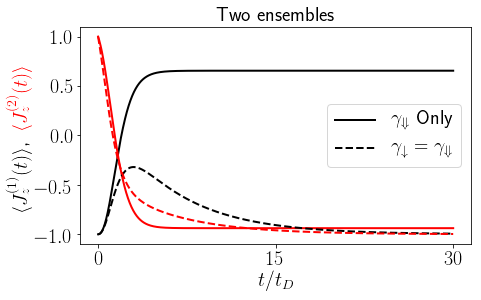

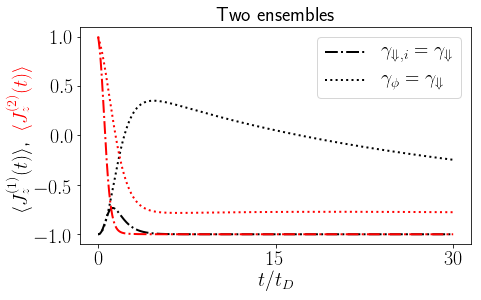

In [13]:
## Plots jz1t, jz2t, jz12t in the Dicke basis for different parameter values

#spin normalization constants
j2_max = (0.5 * N + 1) * (0.5 * N)
jmax = 0.5 * N 
j1max = 0.5 * N1
j2max = 0.5 * N2 

#plot graphics properties
plt.rc('text', usetex = True)
label_size = 20
fig_size = (14, 7)
lw = 2
lw1 = 1*lw
lw2 = 1*lw
lw3 = 1*lw

fig1 = plt.figure(figsize=(7,4))
plt.rc('xtick', labelsize = label_size) 
plt.rc('ytick', labelsize = label_size)

plt.plot(t/td0, jz1t_0/j1max, '-k', label = r"$\gamma_\Downarrow$ Only", linewidth = lw)
plt.plot(t/td0, jz2t_0/j2max, '-r', linewidth = lw)

plt.plot(t/td0, jz1t_gE/j1max, '--k', label = r"$\gamma_\downarrow=\gamma_\Downarrow$", linewidth = lw2)
plt.plot(t/td0, jz2t_gE/j2max, '--r', linewidth = lw2)


plt.rcParams['text.latex.preamble']=[r"\usepackage{xcolor}"]
plt.xlabel(r'$t/t_\text{D}$', fontsize = label_size)

#make double label y-axis - STARTS
left = -5.5
center = 0
yshift = -0.4
#label Jz1
plt.text(left, center+yshift,r'$\langle J_{z}^{(1)}(t)\rangle$,',
         horizontalalignment = 'right',
         verticalalignment='center',
         color = "k", rotation='vertical',fontsize = label_size)

#label Jz2
plt.text(left, center-yshift, r' $\langle J_{z}^{(2)}(t)\rangle$',
        horizontalalignment='right', verticalalignment='center',
         color = "r", rotation='vertical',fontsize = label_size)
#make double label y-axis - ENDS

plt.xticks([0, (tmax/2)/td0, tmax/td0])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.legend(fontsize = label_size)
plt.title(r'Two ensembles', fontsize = label_size)

plt.show()
plt.close()

## Second Figure
plt.rc('xtick', labelsize = label_size) 
plt.rc('ytick', labelsize = label_size)
fig2 = plt.figure(figsize=(7,4))

plt.plot(t/td0, jz1t_gCEi/j1max, '-.k', label = r"$\gamma_{\Downarrow,i}=\gamma_\Downarrow$",
         linewidth = lw3)
plt.plot(t/td0, jz2t_gCEi/j2max, '-.r', linewidth = lw3)

plt.plot(t/td0, jz1t_gD/j1max, ':k', label = r"$\gamma_\phi=\gamma_\Downarrow$", linewidth = lw1)
plt.plot(t/td0, jz2t_gD/j2max, ':r',linewidth = lw1)

plt.rcParams['text.latex.preamble']=[r"\usepackage{xcolor}"]
plt.xlabel(r'$t/t_\text{D}$', fontsize = label_size)

#make double label y-axis - STARTS
#label Jz1
plt.text(left, center+yshift,r'$\langle J_{z}^{(1)}(t)\rangle$,',
         horizontalalignment = 'right',
         verticalalignment='center',
         color = "k", rotation='vertical',fontsize = label_size)

#label Jz2
plt.text(left, center-yshift, r' $\langle J_{z}^{(2)}(t)\rangle$',
        horizontalalignment='right', verticalalignment='center',
         color = "r", rotation='vertical',fontsize = label_size)
#make double label y-axis - ENDS

plt.xticks([0, (tmax/2)/td0, tmax/td0])
plt.yticks([-1, -0.5, 0, 0.5, 1])
plt.legend(fontsize = label_size)
plt.title(r'Two ensembles', fontsize = label_size)
plt.show()
plt.close()

We have studied the dissipative dynamics of two ensembles of TLSs, exploring the possibility of the systems to undergo local dephasing, collective emission of the single ensembles, collective emission of the two ensembles coupled to the same reservoir and local de-excitations. We have found that in the general casse spin exchange between antisymmetrically prepared ensemble is transient [1]. 

#### References

[1] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, https://arxiv.org/abs/1805.05129
Open quantum systems with local and collective incoherent processes: Efficient numerical simulation using permutational invariance
    
[2] Y. Hama, W.J. Munro, and K. Nemoto, *Phys. Rev. Lett.* **120**, 060403 (2018)
    Relaxation to Negative Temperatures in Double Domain Systems
    
[3] M. Xu, D.A. Tieri, E.C. Fine, J.K. Thompson, and M.J. Holland, *Phys. Rev. Lett.* **113**, 154101 (2014)
    Synchronization of Two Ensembles of Atoms

[4] B.A. Chase and J.M Geremia, *Phys. Rev. A* **78**, 052101 (2010)
    Collective processes of an ensemble of spin-1/2 particles

[5] J.R. Johansson, P.D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012) 
    http://qutip.org

In [14]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) 2011 and later.
A. J. Pitchford, P. D. Nation, R. J. Johansson, A. Grimsmo, and C. Granade

QuTiP Version:      4.3.0.dev0+cdc2204a
Numpy Version:      1.13.3
Scipy Version:      1.0.0
Cython Version:     0.27.3
Matplotlib Version: 2.1.1
Python Version:     3.6.3
Number of CPUs:     2
BLAS Info:          INTEL MKL
OPENMP Installed:   False
INTEL MKL Ext:      True
Platform Info:      Darwin (x86_64)
Installation path:  /Users/nathanshammah/Dropbox/GitHub/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex file can be easily generated using `qutip.about.cite()`
